# Titanic Data Wrangling and Data Analysis

**Author:** Neeva K Thomas  
**Project:** Data Wrangling and Preparation  
**Dataset:** Titanic Dataset  
**Language:** Python  


#### In this notebook, I will perform Data importing,cleaning, transformation, feauture Engineering and basic analysis on the Titanic Dataset to prepare it for further exploration.

## 1.Importing Libraries

In [6]:
import numpy as np
import pandas as pd


<h4 style="color: red;">Loading the dataset</h4>

In [7]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.Data Inspection

Now I will explore dataset structure ,data types and identify missing values.

In [19]:
df.info( )
print()
print(df.shape)
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

(891, 12)



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


So from this info() and shape output, we can understand that the dataset contains 891 rows and 12 columns. And the 'Age', 'Cabin' and 'Embarked' column contains few null entries too. Since Cabin has a lot of missing values, it might not be beneficial for us to use, so might drop that later. 


## 3.Data Cleaning

<h4 style="color: red;">Handling missing values</h4>

In this step, I will be handling missing data of Age, Embarked and Cabin

In [32]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            891
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This means Age has few missing entries which I will be replacing it with the mean age. Embarked as only few missing data which can be dropped wheras in Cabin, there is a lot of missing entries which we will be dropping from the entire Dataset. 

In [13]:
df['Age']=df['Age'].fillna(df['Age'].median())
print(df['Age'])

df.dropna(subset=['Embarked'], inplace=True)
df['Embarked'].isna().sum()

df.drop(columns=['Cabin'], inplace=True)
df.columns

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<h4 style="color:red;">Next we will be converting the 'Sex' column and 'Embarked' column into categorical datatype</h4>

In [15]:
df["Sex"]=df["Sex"].astype("category")
df["Embarked"]=df["Embarked"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 71.4+ KB


By this conversion, we make our DataFrame more memory efficient and these variables represent fixed categorical values and not free text strings

<h4 style="color:red";>Removing Duplicate Rows</h4>

We will be now checking if there is any duplicates exists in our dataset and will remove them if present. 


In [16]:
df.duplicated().sum()

np.int64(0)

No duplicate entries exists in our dataset, so no removal is needed. 

<h4 style="color:red;">Normalizing Fare Column</h4> 

Since the values of Fare Column varies with huge difference, we will be normalizing the column, basically rescales the values between 0 and 1 so that all values are on a comparable scale.


In [13]:
df['Fare_normalized']=(df['Fare']- df['Fare'].min())/(df['Fare'].max()-df['Fare'].min())
df[['Fare', 'Fare_normalized']].head(10)

,Fare,Fare_normalized
0,7.2500,0.014151
1,71.2833,0.139136
2,7.9250,0.015469
3,53.1000,0.103644
4,8.0500,0.015713
5,8.4583,0.016510
6,51.8625,0.101229
7,21.0750,0.041136
8,11.1333,0.021731
9,30.0708,0.058694


## 4.Feature Engineering: Creating 'Family_size'

In this step we will be creating a column named 'Family_size' which will be found by adding up the numbers of Siblings/Spouses(SibSp), Parents/Children(Parch) and themselves(1). 

In [18]:
df['Family_size']=df['Parch']+df['SibSp']+1
df[['SibSp','Parch','Family_size']].head(10)

,SibSp,Parch,Family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


## 5.Standardizing 'Age' using Standard Scalar

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

age_mean=df['Age'].mean()
age_std=df['Age'].std()

df['Age_standardized']=(df['Age']-age_mean)/age_std  #scaled using formula

scaler=StandardScaler()
df['Age_scaled']=scaler.fit_transform(df[['Age']]) #scaled using library
df[['Age','Age_standardized','Age_scaled']].head(10)


fare_max=df['Fare'].max()
fare_min=df['Fare'].min()

mms=MinMaxScaler()
df['Fare_scaled']=mms.fit_transform(df[['Fare']])  #scaled using library
df['Fare_normalized']=(df['Fare']-fare_min)/(fare_max-fare_min) # scaled using equation

df[['Fare','Fare_normalized','Fare_scaled']].head(10)


df.drop(columns=['Age_standardized','Fare_normalized'], inplace=True)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 

## On-Hot Encoding of 'Sex' and 'Embarked'

We will convert categorical columns 'Sex' and ' Embarked' into binary numeric values.

In [13]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.drop(columns=['Cabin'], inplace=True) #because Cabin contain many null values. 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [8]:
df.drop(columns=['Age','Fare'], inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## 6.PIVOT TABLE: 

<h4 style="color:red">Average Age by Passenger Class and Sex</h4>

In [30]:
pivot = df.pivot_table(index='Pclass', columns='Sex_male', values='Age_scaled', aggfunc='mean')
pivot.columns = ['Female', 'Male']
pivot

,Female,Male
Pclass,,
1,0.338422,0.797879
2,-0.067245,0.071753
3,-0.547599,-0.219858


 <h4 style="color:red">Survival Rate by Class and Sex</h4>

In [33]:
pivot= df.pivot_table(index='Pclass', columns='Sex_male', values='Survived', aggfunc='mean')
pivot.columns=['Female', 'Male']
pivot

,Female,Male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447



<h4 style="color:red">Survival rate by Family Size</h4>

In [36]:
pivot=df.pivot_table(index='Family_size',values='Survived', aggfunc='mean')
pivot

,Survived
Family_size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


From the pivot tables, we observe that:
- Females had significantly higher survival rate than males.
- First-class passengers survived more often than second or third class.
- Passengers with a small family size (2-4) had better survival outcomes than those traveling alone or in large families.


## 7.Visualization

<h4 style="color:green">1.Survival Count</h4>

This chart shows how many passenger survived(1) and how many not(0)

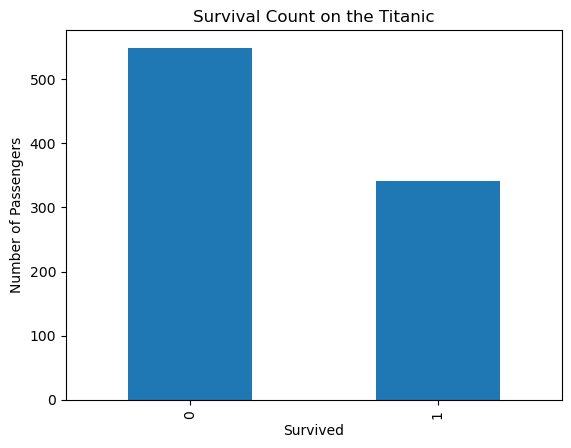

In [38]:
import matplotlib.pyplot as plt

df['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survival Count on the Titanic')
plt.show()

<h4 style="color:green">2.Survival Rate by Sex</h4>

This shows the survival probability by Males and Females

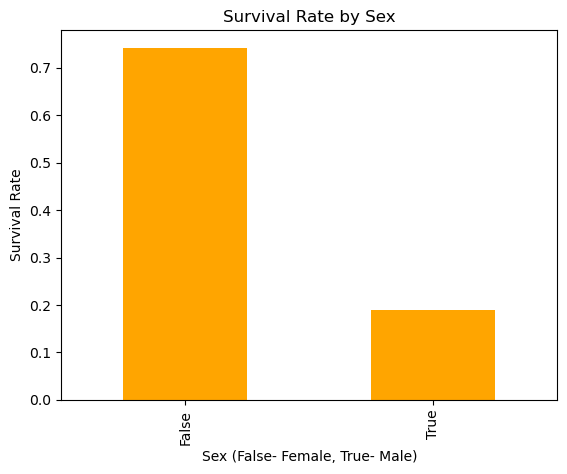

In [61]:
df.groupby('Sex_male')['Survived'].mean().plot(kind='bar', color='orange')
plt.xlabel('Sex (False- Female, True- Male)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

From the above graph we can clearly understand that women survival rate is much higher than male which shows that women were given priority during evacuation.

<h4 style="color:green">3.Survival Rate by Passenger Class</h4>

This graph shows how survival probability varies according to the passenger class. 

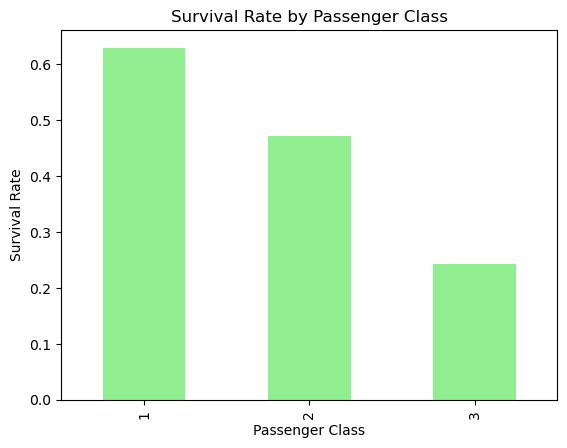

In [63]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color='lightgreen')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

This clearly depicts that 1st class passenger were given high priority than the restfollowed by second and then third. This shows that socioeconomic status played an important role in survival.


<h4 style="color:green">4.Age distribution of Passengers</h4>

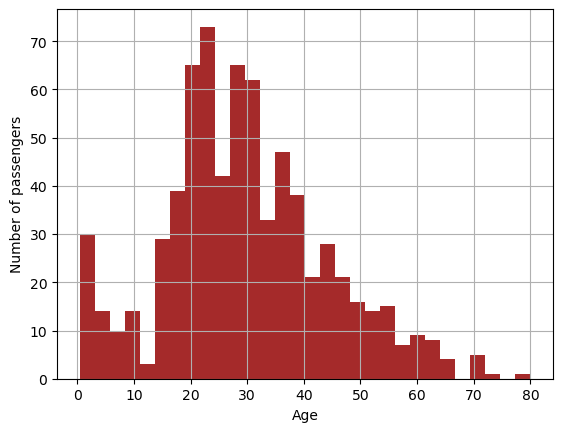

In [66]:
df['Age'].hist(bins=30, color='brown')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

Most passengers were between Age 20 and 40. Only few children and elderly were present in comparison.


<h4 style="color:green">5.Fare Distribuition of Passengers.</h4>

df['Fare'].hist(bins=30)
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.title('Distribution of Ticket Fare')
plt.show()

This depicts that most of the tickets were sold for less than 100bucks and higher priced tickets were purchased by very few people. 

<h3 style="color:red">FINAL ANALYSIS AND INSIGHTS</h3>

From the visual and numerical analysis:
- Females had a significantly higher survival rate than males.
- First class passengers survived more often than second and third class.
- Younger passengers (especially children) had a slightly higher survival rate.
- Lower ticket fares correspond to lower survival rates, indicating socioeconomic influence.
- Most passengers paid relatively low fares, while a few paid extremely high fees.

Overall, the analysis shows that women, children, and wealthy first-class travelers were more likely to survive the disaster.


### 9. Exporting the Final Cleaned Dataset

The cleaned and processed Titanic dataset has been exported as `titanic_cleaned.csv` for further analysis or machine learning tasks.


In [8]:
df.to_csv("titanic_cleaned.csv", index=False)